The first 5 cells are classes and imports that will be used throught the project

In [73]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

In [74]:
class DataCollection:
    def __init__(self, dataset_path):
        self.dataset_path = dataset_path
        
        
    def get_data(self):
        try:
            df=pd.read_csv(self.dataset_path)
            return df
        except Exception as exp:
            raise Exception

In [75]:
class EDA:
    def __init__(self, df):
        self.df = df
    
    
    def check_null(self):
        print("\nNull Value Check:")
        print(self.df.isnull().sum())
        if not self.df.isnull().sum().sum():
            print("No Null Value Present in the data")
        else:
            print("Null Value Present in the data")
    
    
    def check_statistics(self):
        print("\n\n\n\n\nData statistical description Check:")
        print(self.df.describe())
        print("\n\n\n\n\nData Info Check:")
        print(self.df.info())
    
    
    def check_dtype_object_count_values(self):
        for column_name in self.df.columns:
            if (not self.df[column_name].dtype == np.int64) and (not self.df[column_name].dtype == np.float64):
                print("\n\n{}".format(column_name))
                print(self.df[column_name].value_counts())
    
    
    def object_to_numerical(self):
        le = LabelEncoder()
        for column_name in self.df.columns:
            if (not df[column_name].dtype == np.int64) and (not df[column_name].dtype == np.float64):
                le.fit(df[column_name])
                self.df[column_name] = le.transform(self.df[column_name])
        return self.df
    
    
    def correlation_check(self):
        print("Correlation in Tabular Form:")
        corr_df = self.df.corr()
        display(corr_df)
        print("\n\n\nCorrelation in Visual Form:")
        sns.heatmap(self.df.corr())
        

In [76]:
class Visualization:
    def __init__(self, df):
        self.df = df
    
    
    def distribution_through_histogram(self, data_column):
        hist = px.histogram(self.df, 
                   x=data_column, 
                   nbins=40,
                   color_discrete_sequence=['blue'],
                   title='Distribution of {}'.format(data_column))
        hist.update_layout(bargap=0.1)
        hist.show()
    
    
    def boxplot(self,data):
        plt.figure(figsize=(12,5))
        plt.title("Box plot for {}".format(data.name))
        plt.boxplot(data)
        
        
    def comparitive_count_plot(self, data1, data2):    
        plt.figure(figsize = (40, 20))
        plt.title("Comparision Count plot for {} and {}".format(data1.name, data2.name))
        sns.countplot(data1, hue = data2)
    
    
    def comparitive_scatter_plot(self, col, row, color, extra_data):
        fig = px.scatter(df_outlier_charges, 
                         x=col, 
                         y=row, 
                         color=color, 
                         opacity=1, 
                         hover_data=extra_data, 
                         title='{} vs. {}'.format(row,col))
        fig.update_traces(marker_size=5)
        fig.show()

In [77]:
class PandasProfiling:
    def __init__(self, df):
        self.df = df
    
    
    def create_profile(self):
        profile = ProfileReport(self.df)
        profile.to_notebook_iframe()

# Program Starts Here

#### 1. Reading the dataset into pandas dataframe

In [78]:
dataset_path = "insurance.csv"
df = DataCollection(dataset_path).get_data()
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


This is a medical insurance dataset. We can see that there are 7 columns among which 3 are categorical and rest are numeric. The columns mean the following:
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

#### 2. Analysing Data

In [79]:
eda = EDA(df)

We checked if there was any null value in any of the column in the data.
Luckily there are none in this dataset

In [80]:
eda.check_null()


Null Value Check:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
No Null Value Present in the data


Now we check the statistical info of the data in the dataset. We can analyze the mean, std, quartiles, median and min/max values.
We also found the dtype of every column.

In [81]:
eda.check_statistics()






Data statistical description Check:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010





Data Info Check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-nul

We see that there are object datatype. Using the following code gives us an idea about the classes of categories and their element counts, that the object columns can have.

In [82]:
eda.check_dtype_object_count_values()



sex
male      676
female    662
Name: sex, dtype: int64


smoker
no     1064
yes     274
Name: smoker, dtype: int64


region
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


Lets now convert the object dtype datas to categorically numeric values.

In [83]:
df = eda.object_to_numerical()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Well after this we tried to find the correlation between the columns. I expected there to be a correlation between smoker and chargers and Seems like there is like 78% corelation among these columns. 
Likewise, I also assumed there to be some effect on the bmi of a smoker, but the corellation graph indicates no such logic.

Correlation in Tabular Form:


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000





Correlation in Visual Form:


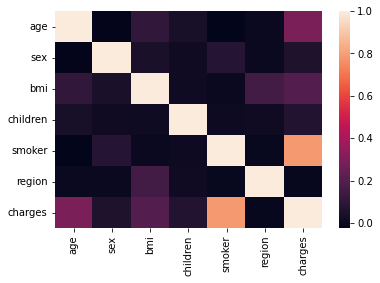

In [84]:
eda.correlation_check()

#### 2. Visualizing Data

In [85]:
visual = Visualization(df)

We initially checked the box plot of every columns. This helps us to identify if there are any outliers in the data. By visualizing, it seems like there is vast difference of charges since it has the maximum outliers present. Also the bmi data has outliers.

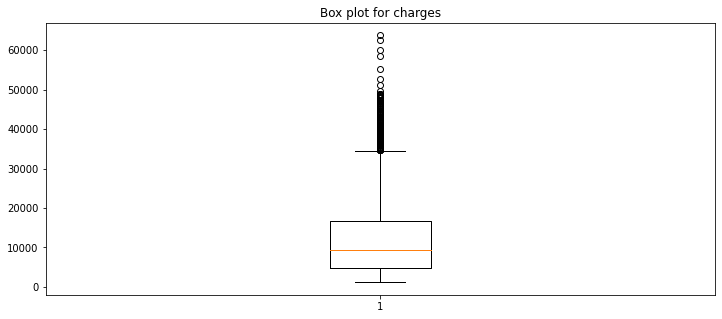

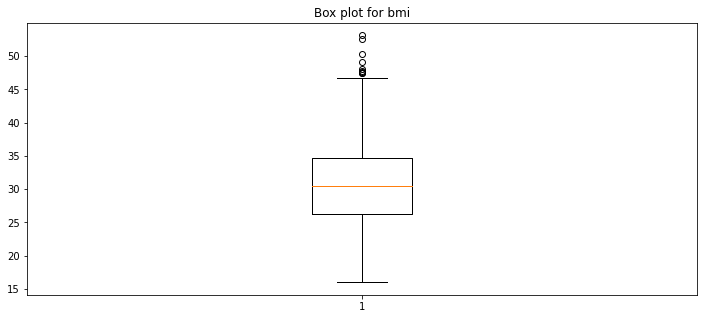

In [86]:
visual.boxplot(df["charges"])
visual.boxplot(df["bmi"])

It would really be interesting to know what were the factors for outliers in the insurance charges. By analysis below, we can see that there are 139 outliers. Now we can analyze those datas to see if we can find some new findings.

In [87]:
quartile_1 = df.charges.quantile(0.25)
quartile_3 = df.charges.quantile(0.75)
IQR = quartile_3 - quartile_1
lower_limit = (quartile_1 - (1.5*IQR))
upper_limit = (quartile_3 + (1.5*IQR))
df_outlier_charges = pd.DataFrame()
df_outlier_charges = df[(df.charges<lower_limit)|(df.charges>upper_limit)]
df_outlier_charges.shape

(139, 7)

Now we will compare all the other columns of the df_outlier_charges dataframe with charges. This will give us a visual analysis of which are the factors that causes more use of health insurance charges.

In [88]:
outlier_visuals = Visualization(df_outlier_charges)
outlier_visuals.comparitive_scatter_plot(col="age", row="charges", color="smoker", extra_data=['sex', 'region'])

We are now analyzing the outlier of charges. This was a very interesting finding. Most of the people that have high amount in health insurance bills are smokers.  The charges are irrespective of the gender and region they reside in. 
Hence most of the outlier in "charges" column is caused by the people who smoke more.
Now lets test out if the no of childern will effect the triggering of high insurance charges or not.

In [89]:
outlier_visuals.comparitive_scatter_plot(col="age", row="charges", color="children", extra_data=['sex', 'region'])

The people who have 0 children and the people who have 1,2 or 3 children kind of have the same impact in health insurance charges. Its strange to know this since the childrens are also covered by the health insurance charges.

Getting back to the main data i.e. df

 Using countplot we can check the age group and sex who smoke more. So from the plot we can see that, men smoke more than women and the age group from 18 to 20 wins the race when it comes to frequency of smoking.

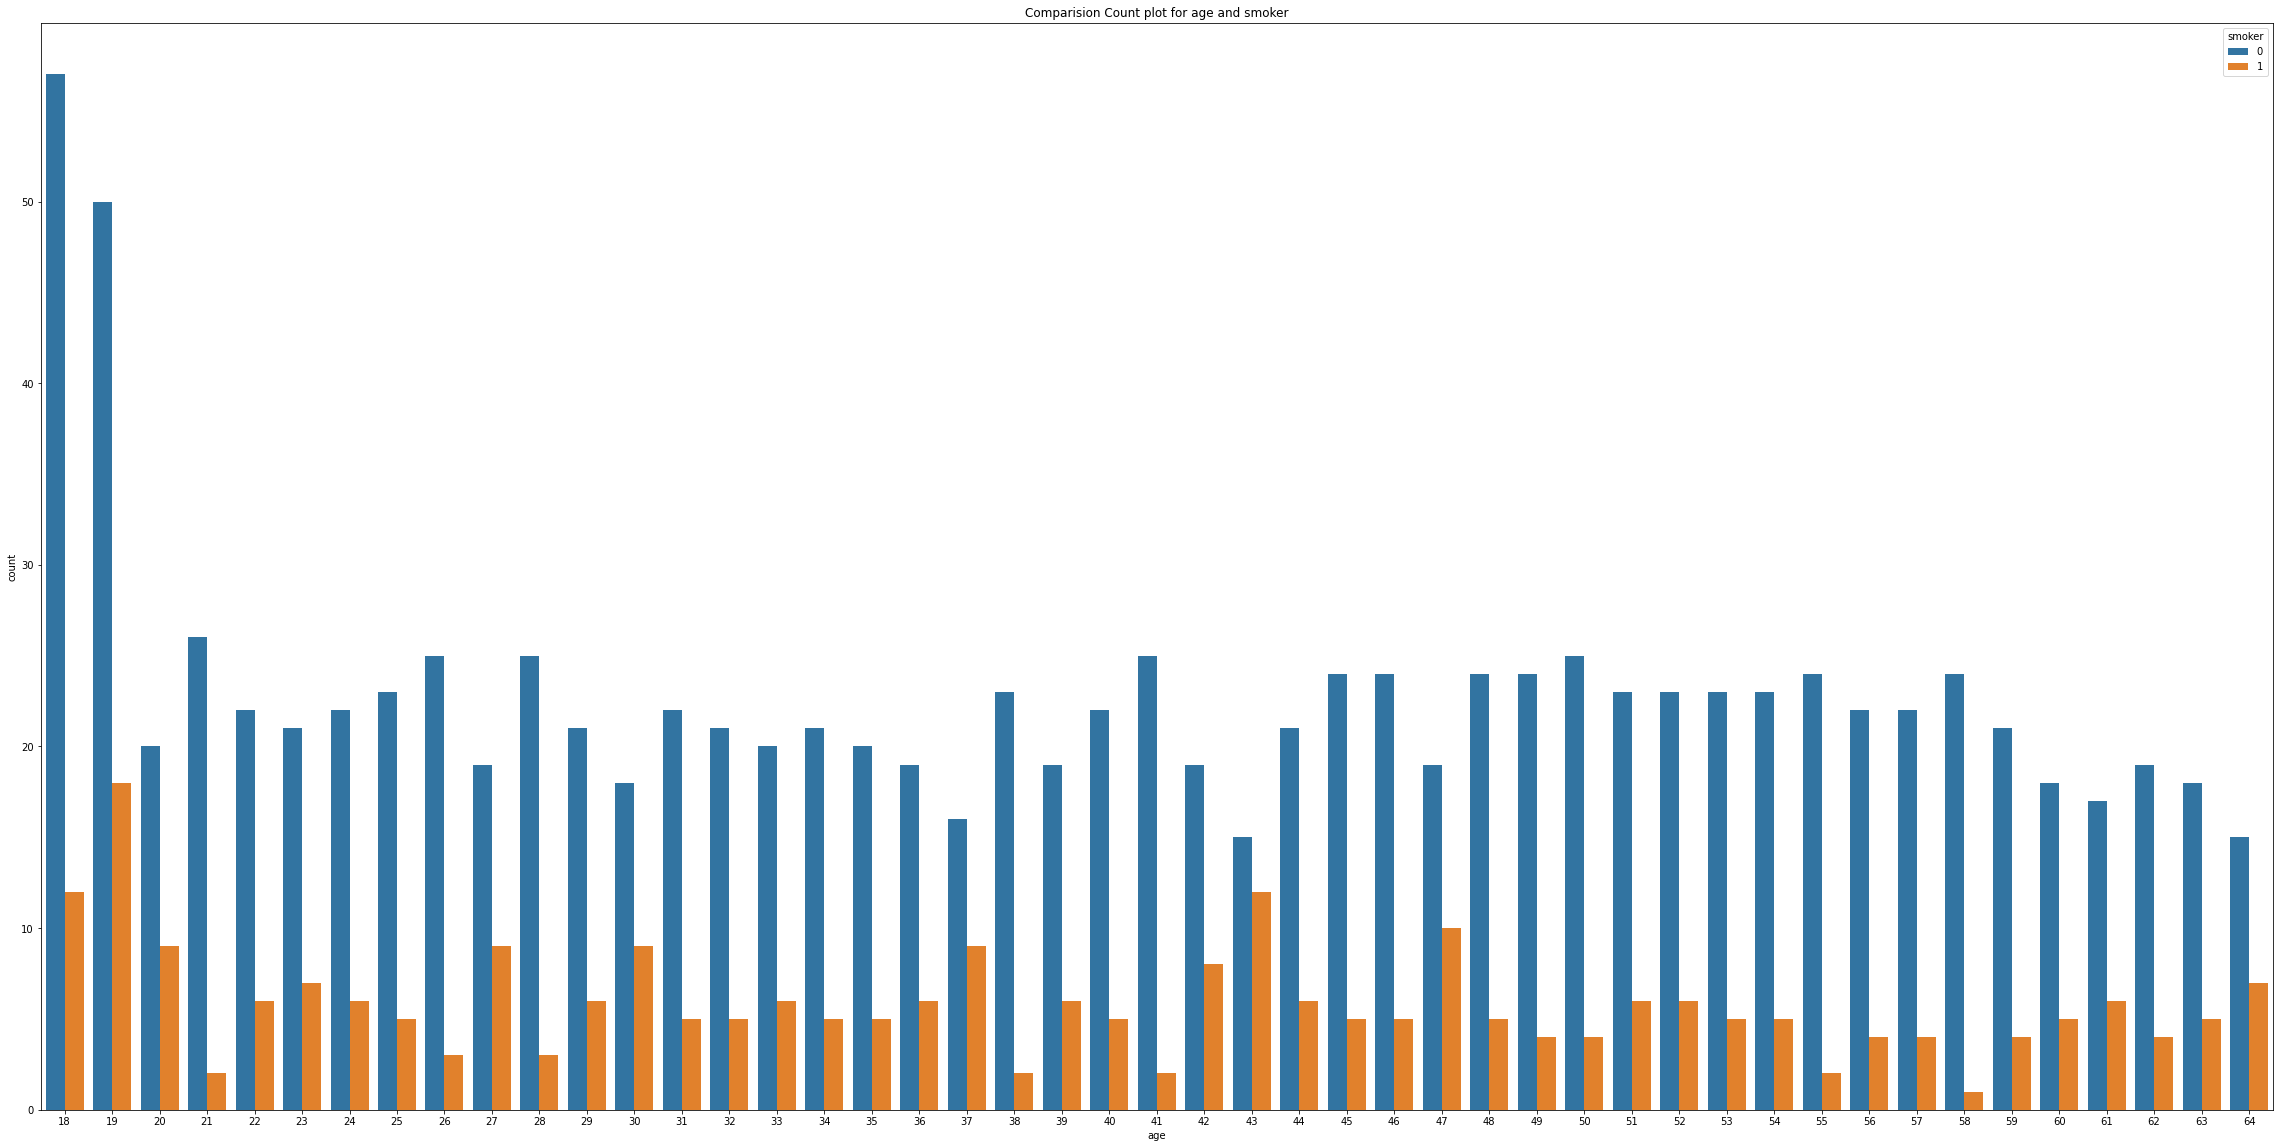

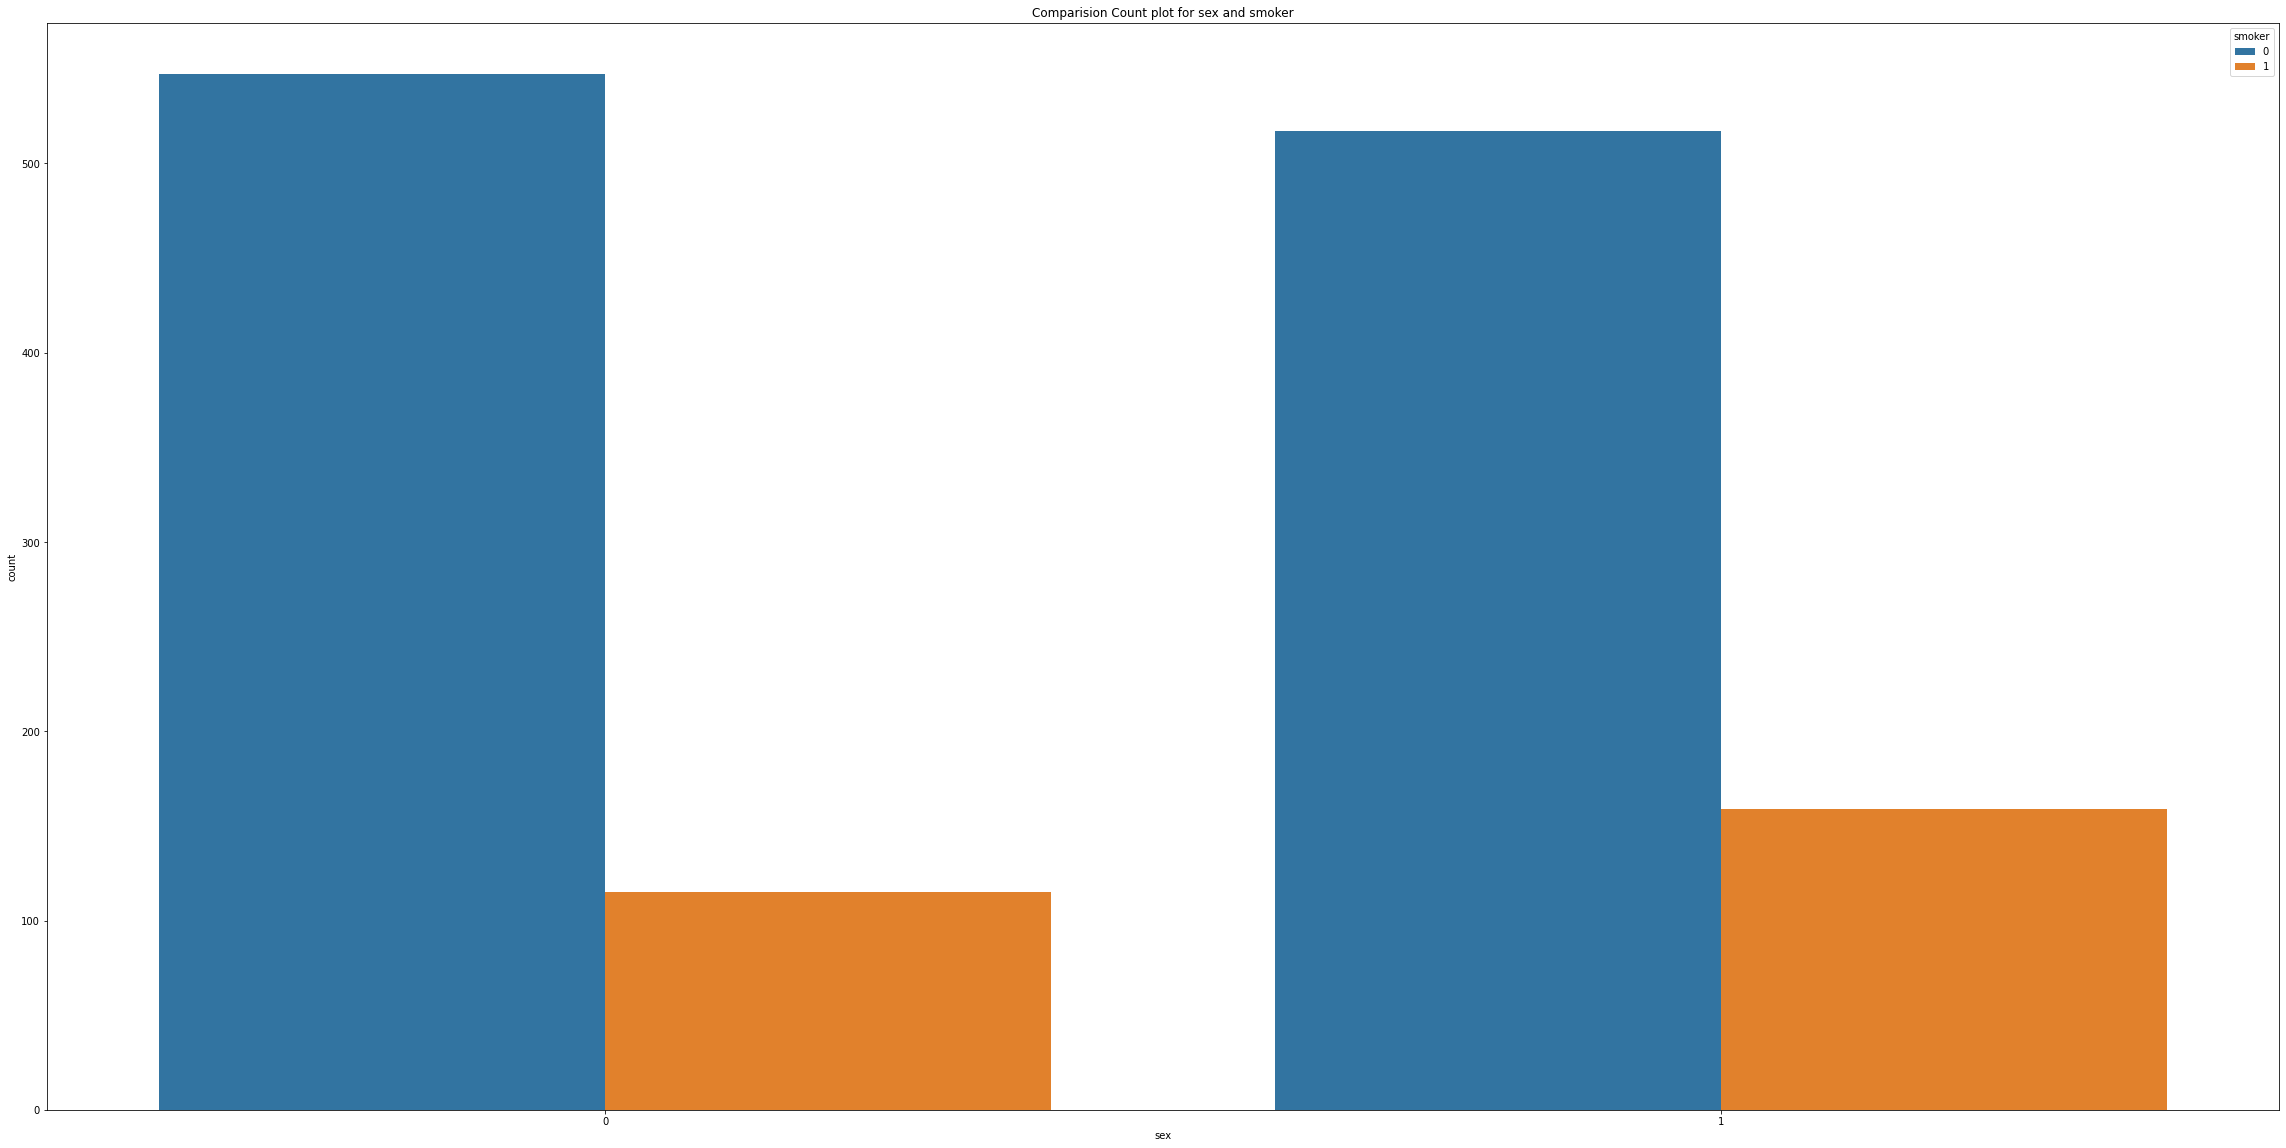

In [90]:
visual.comparitive_count_plot(df.age, df.smoker)
visual.comparitive_count_plot(df.sex, df.smoker)

Distribution of bmi seems to be normally distributed. The measures of central tendency seems to accumulate in the middle of the bell shaped curve. The average BMI in patients is 30.

In [91]:
visual.distribution_through_histogram(df["bmi"])

Using pandas profling to check if we can find any other finding from our data

In [ ]:
pandas_profile = PandasProfiling(df)
pandas_profile.create_profile()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]